# Analysis and visualization of 3D data in Python

Daniela Ushizima, Alexandre de Siqueira, Stéfan van der Walt

_BIDS @ University of California, Berkeley_

_Lawrence Berkeley National Laboratory - LBNL_

* Support material for the tutorial _Analysis and visualization of 3D data in Python_.

This tutorial will introduce how to analyze three dimensional stacked and volumetric
images in Python, mainly using scikit-image. Here we will learn how to:
  * pre-process data using filtering, binarization and segmentation techniques.
  * inspect, count and measure attributes of objects and regions of interest in the data.
  * visualize 3D data.

Please prepare for the tutorial by [installing the pre-requisite
software](preparation.md) beforehand.

For more info:
  * [[ISVC 2019]](https://www.isvc.net/)
  * [[scikit-image]](https://scikit-image.org/)


## What is scikit-image?

scikit-image is a collection of image processing algorithms which aims to integrate well with for the SciPy ecosystem.

It is well documented, and provides well-tested code to quickly build sophisticated image processing pipelines.

## Preparing for the tutorial

To participate, you'll need to git clone (or download the .zip from GitHub): https://github.com/BIDS/ISVC2019.git

You can do that using the line below:

`git clone https://github.com/BIDS/ISVC2019.git isvc2019_skimage`

Please execute it on a terminal. If you have already cloned the material, on the tutorial folder, please type:

`git pull`

Then, reload the notebook to ensure that you have the latest updates.

Lets use a magic command to open figures within this notebook:

In [1]:
%matplotlib inline

You can check the other magics available, and what they do, at the IPython documentation [[1]](https://ipython.readthedocs.io/en/stable/interactive/magics.html).

Before we can start using `scikit-image` to process our images and data, we need to understand how it represents images. For this, we will use NumPy.

## NumPy at a glance

NumPy is the fundamental package for scientific computing in Python. It provides [[2]](https://docs.scipy.org/doc/numpy/user/whatisnumpy.html):

* a multidimensional array object;
* various objects derived from it, such as masked arrays and matrices;
* an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.

Throughout several examples, we will check some NumPy capabilities. We start importing the package:

In [2]:
import numpy as np

<div class="alert alert-info">

__Example 1:__ What version of NumPy do you have installed?

In [3]:
np.__version__

'1.16.4'

<div class="alert alert-info">

__Example 2:__ How to build an array of zeros, containing 300 rows and 500 columns?  

In [4]:
arr_zeros = np.zeros((300, 500))

<div class="alert alert-info">

__Example 3:__ How to generate an array with integer numbers, from 0 to 9?

In [5]:
arr_integers = np.arange(10)
print(arr_integers)

[0 1 2 3 4 5 6 7 8 9]


<div class="alert alert-info">

__Example 4:__ How do we obtain the square of this array?

In [6]:
arr_square = arr_integers ** 2
print(arr_square)

[ 0  1  4  9 16 25 36 49 64 81]


<div class="alert alert-info">

__Example 5:__ What is the data within this array? What about the array `[0.5, 1, 1.5]`?

In [7]:
print(arr_square.dtype)
arr_halves = np.array([0.5, 1, 1.5])
print(arr_halves.dtype)

int64
float64


<div class="alert alert-info">

__Example 6:__ What is the shape of the following array: `[[1, 2, 3], [4, 5, 6]]`?

In [8]:
array = np.array([[1, 2, 3], [4, 5, 6]])
print(array.shape)

(2, 3)


<div class="alert alert-info">

__Example 7:__ What is the result of ``[[1, 2, 3], [4, 5, 6]]`` + ``[10, 11, 12]``?

In [9]:
array_1 = np.array([[1, 2, 3], [4, 5, 6]])
array_2 = np.array([10, 11, 12])
print(array_1 + array_2)  # broadcasting

[[11 13 15]
 [14 16 18]]


<div class="alert alert-info">

__Example 8:__ What is the result of ``np.array([1, 2, 3], dtype=np.uint8) - 2``?

In [10]:
uint_array = np.array([1, 2, 3], dtype=np.uint8)
print(uint_array - 2)  # 'u' stands for unsigned

[255   0   1]


<div class="alert alert-info">

__Example 9:__ What is the result of ``x = np.ones((5, 1)); x @ x.T``?

In [11]:
x = np.ones((5, 1))
print(x @ x.T)  # @ denotes matrix multiplication

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


<div class="alert alert-info">

__Example 10:__ What is the result of ``x = np.array([1, 2, 3]); x[x < 3]``?

In [12]:
x = np.array([1, 2, 3, 4, 5])
print(x[x < 3])

[1 2]


# In scikit-image, images are NumPy arrays

Images are represented in ``scikit-image`` using standard NumPy arrays. These arrays are easily shared with other libraries in the scientific Python ecosystem, such as ``matplotlib`` and ``scipy``.

Let's see how to build a grayscale image as a 2D array. First, we import `numpy` and `matplotlib.pyplot`:

In [13]:
import numpy as np
import matplotlib.pyplot as plt

Now we use `random.random` to generate a random image with 500 rows and 500 columns. This function returns numbers in the interval `[0.0, 1.0)`:

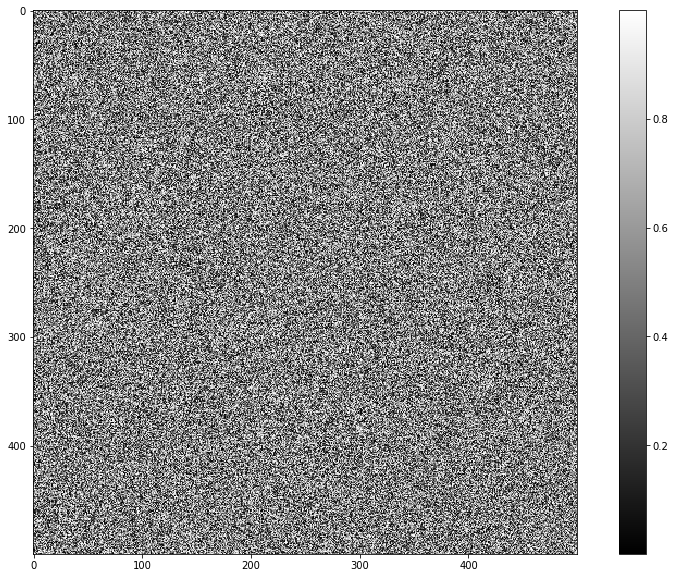

In [14]:
random_image = np.random.random([500, 500])

# generating the figure.
plt.figure(figsize=(15, 10))
plt.imshow(random_image, cmap='gray')
plt.colorbar();

The same holds for "real-world" images, which are also treated as NumPy arrays:

* "coins" type: <class 'numpy.ndarray'>
* "coins" data type: uint8
* "coins" shape: (303, 384)


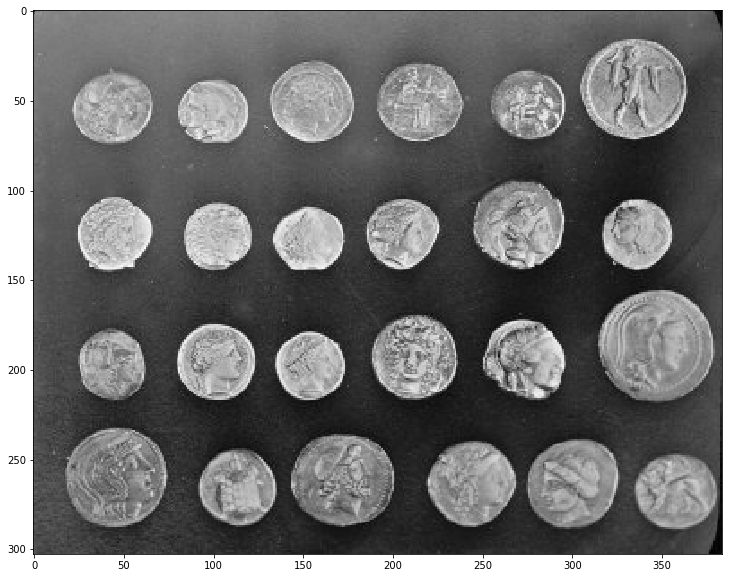

In [15]:
from skimage import data

coins = data.coins()

print(f'* "coins" type: {type(coins)}')
print(f'* "coins" data type: {coins.dtype}')
print(f'* "coins" shape: {coins.shape}')

# generating the figure.
plt.figure(figsize=(15, 10))
plt.imshow(coins, cmap='gray');

A color image is a 3D array, where the last dimension has size 3 and represents the red, green, and blue channels:

* "chelsea" shape: (300, 451, 3)
* "chelsea" min/max values: (0, 231)


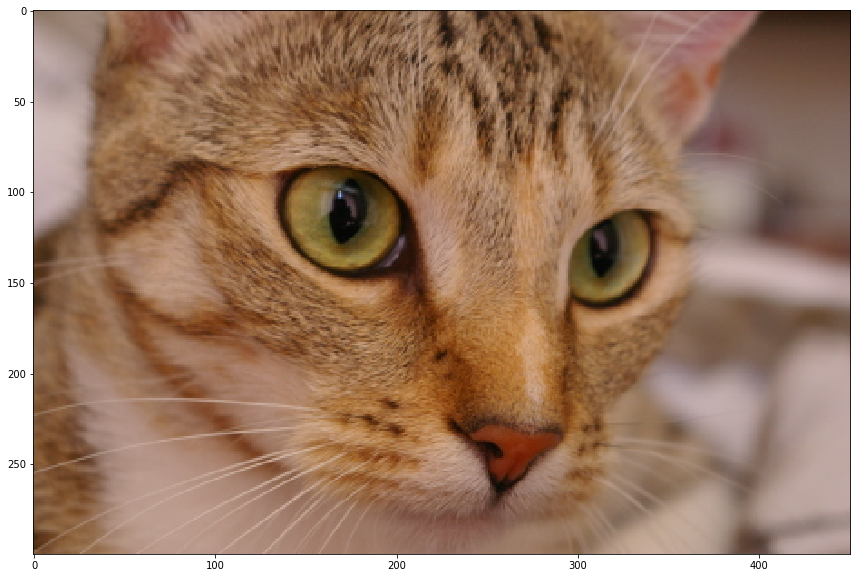

In [16]:
chelsea = data.chelsea()

print(f'* "chelsea" shape: {chelsea.shape}')
print(f'* "chelsea" min/max values: {chelsea.min(), chelsea.max()}')

# generating the figure.
plt.figure(figsize=(15, 10))
plt.imshow(chelsea);

Since these are just NumPy arrays, we can manipulate them directly. As an example, lets make a red square by using standard array slicing and manipulation:

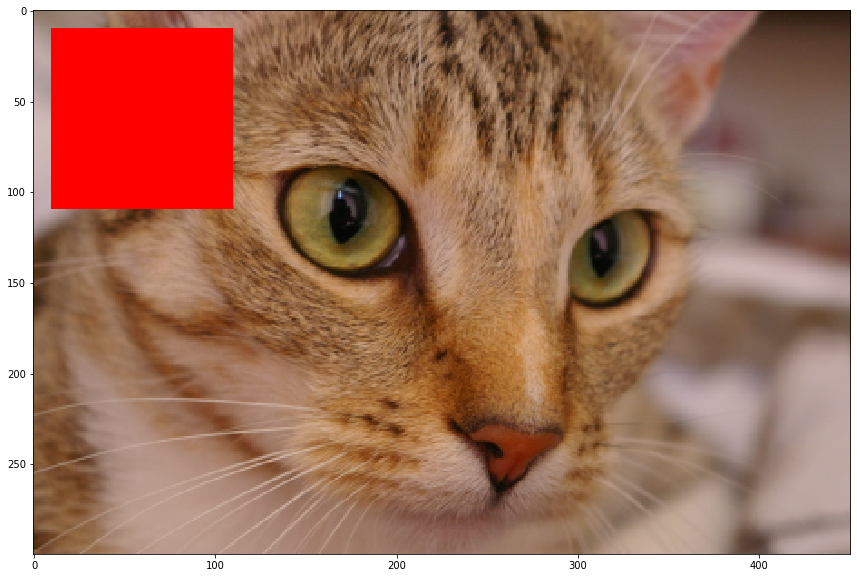

In [17]:
chelsea[10:110, 10:110, :] = [255, 0, 0]  # [red, green, blue]

# generating the figure.
plt.figure(figsize=(15, 10))
plt.imshow(chelsea);

Images can also include transparent regions by adding a 4th dimension, called an *alpha layer*.

## Displaying images using matplotlib

In [18]:
from skimage import data

chelsea = data.chelsea()
rocket = data.rocket()

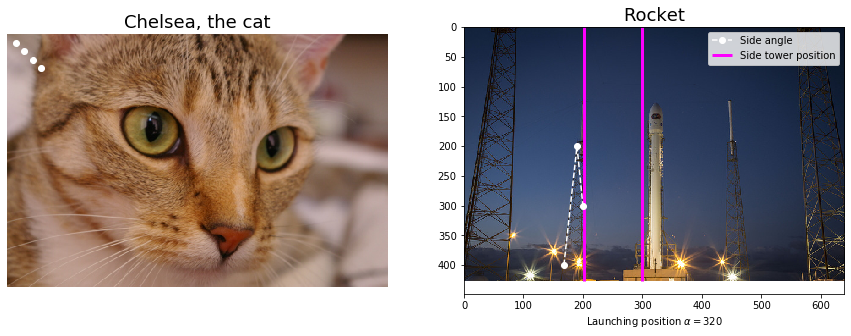

In [19]:
import matplotlib.pyplot as plt

_, (win_left, win_right) = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

win_left.imshow(chelsea)
win_left.set_title('Chelsea, the cat', fontsize=18)
win_left.scatter(x=[10, 20, 30, 40],
                 y=[10, 20, 30, 40], color='white')
win_left.axis('off')

win_right.imshow(rocket)
win_right.set_title('Rocket', fontsize=18)
win_right.set_xlabel(r'Launching position $\alpha=320$')

win_right.vlines([202, 300], 0, rocket.shape[0], colors='magenta',
                 linewidth=3, label='Side tower position')
win_right.plot([168, 190, 200], [400, 200, 300], color='white',
               linestyle='--', marker='o', label='Side angle')

win_right.legend();

For more on plotting, see the Matplotlib documentation [[2]](https://matplotlib.org/gallery/index.html#images-contours-and-fields) and the pyplot API [[3]](https://matplotlib.org/api/pyplot_summary.html).

## Data types and image values

In literature we have find different conventions for representing image values. Two of them are:

 * `0 - 255`, where  0 is black, 255 is white
 * `0 - 1`, where  0 is black, 1 is white

``scikit-image`` supports both conventions; the choice is determined by the data type of the array.

For instance, here we generate two valid images:

* "linear_float": float64, 0.0, 1.0
* "linear_uint": uint8, 0, 255


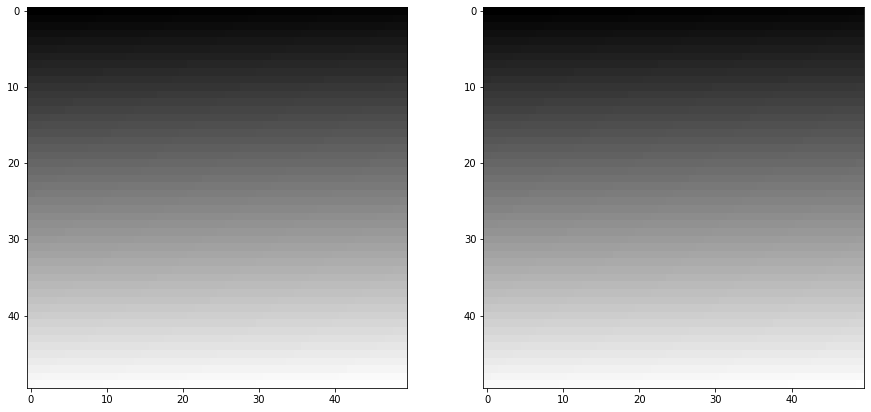

In [20]:
linear_float = np.linspace(0, 1, 2500).reshape((50, 50))
linear_uint = np.linspace(0, 255, 2500).reshape((50, 50)).astype(np.uint8)

print(f'* "linear_float": {linear_float.dtype}, {linear_float.min()}, {linear_float.max()}')
print(f'* "linear_uint": {linear_uint.dtype}, {linear_uint.min()}, {linear_uint.max()}')

fig, (win_left, win_right) = plt.subplots(1, 2, figsize=(15, 15))
win_left.imshow(linear_float, cmap='gray')
win_right.imshow(linear_uint, cmap='gray');

The library is designed in such a way that any data-type is allowed as input,
as long as the range is correct (0-1 for floating point images, 0-255 for unsigned bytes,
0-65535 for unsigned 16-bit integers).

You can convert images between different representations by using ``util.img_as_float``, ``util.img_as_ubyte``, etc.:

In [21]:
from skimage.util import img_as_float, img_as_ubyte

image = data.chelsea()

image_ubyte = img_as_ubyte(image)
image_float = img_as_float(image)

print(f'* "image_ubyte" type: {image_ubyte.dtype}, min: {image_ubyte.min()}, max: {image_ubyte.max()}')
print(f'* "image_float" type: {image_float.dtype}, min: {image_float.min()}, max: {image_float.max()}')
print()
print("231/255 =", 231/255)

* "image_ubyte" type: uint8, min: 0, max: 231
* "image_float" type: float64, min: 0.0, max: 0.9058823529411765

231/255 = 0.9058823529411765


Your code would then typically look like this:

```python
def my_function(any_image):
   float_image = img_as_float(any_image)
   # Proceed, knowing image is in [0, 1]
```

We recommend using the floating point representation, given that
``scikit-image`` mostly uses that format internally.

<div class="alert alert-success">

__Exercise: <font color='red'>(⏰ 5 min)</font>__ Define a function that takes as input an RGB image and a pair of coordinates (row, column), and returns a copy with a green letter H overlaid at those coordinates. The coordinates point to the top-left corner of the H.

The arms and strut of the H should have a width of 3 pixels, and the H itself should have a height of 24 pixels and width of 20 pixels.

Start with the following template:

```python
def draw_H(image, coords, color=(0, 255, 0)):
    """
    Draws the letter H within an input image.
    """
    image_with_H = image.copy()
    
    ...
    
    return image_with_H
```


Then, test your function using:

```python
from skimage import data
import matplotlib.pyplot as plt

chelsea = data.chelsea()
chelsea_with_H = draw_H(chelsea, (50, -50))

plt.figure(figsize=(15, 10))
plt.imshow(chelsea_with_H);
```

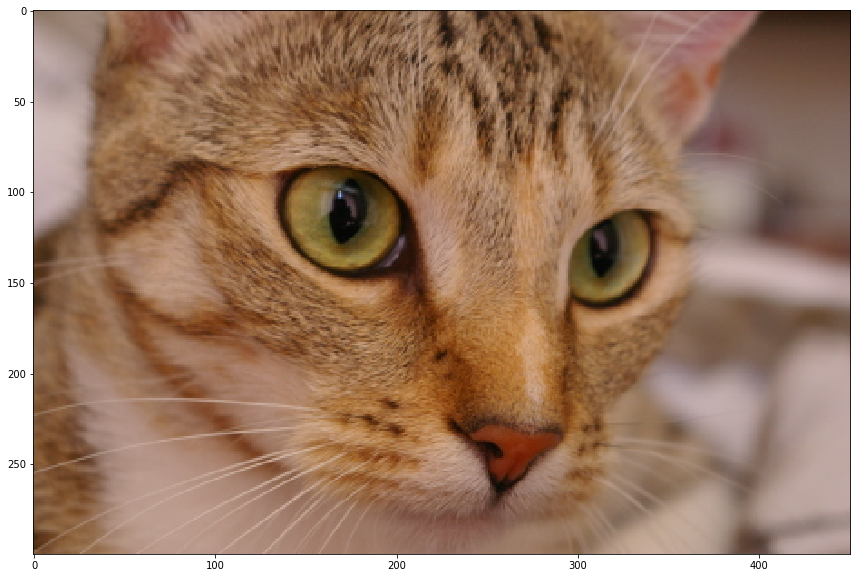

In [22]:
def draw_H(image, coords, color=(0, 255, 0)):
    """
    Draws the letter H within an input image.
    """
    image_with_H = image.copy()
    
    ...
    
    return image_with_H


from skimage import data
import matplotlib.pyplot as plt

chelsea = data.chelsea()
chelsea_with_H = draw_H(chelsea, (50, -50))

plt.figure(figsize=(15, 10))
plt.imshow(chelsea_with_H);

<div class="alert alert-success">

__Exercise: <font color='red'>(⏰ 5 min)</font>__ Display the different color channels of `chelsea` along, each as a gray-scale image.

TypeError: Image data of dtype object cannot be converted to float

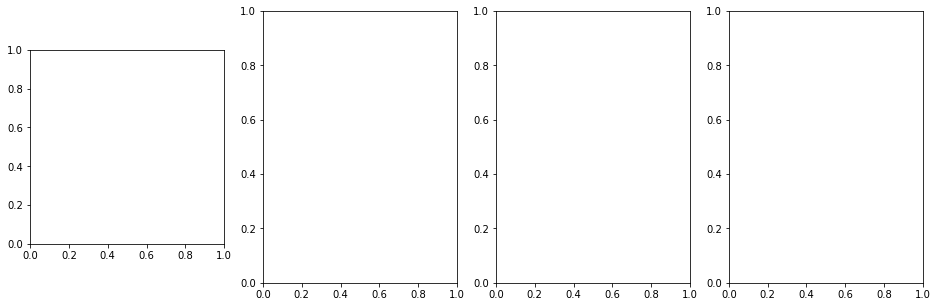

In [23]:
chelsea = data.chelsea()

# First, assign each color channel to a different variable.
channel_r = ...
channel_g = ...
channel_b = ...

# Then, display the image and the red, green and blue channels.
_, (ax_r, ax_g, ax_b, ax_color) = plt.subplots(nrows=1, ncols=4, figsize=(16, 5))

ax_r.imshow(channel_r, cmap='gray')
ax_r.set_title('Red channel')
ax_r.axis('off')

ax_g.imshow(channel_g, cmap='gray')
ax_g.set_title('Green channel')
ax_g.axis('off')

ax_b.imshow(channel_b, cmap='gray')
ax_b.set_title('Blue channel')
ax_b.axis('off')

# Here we rebuild the color image stacking the R, G, and B layers again.
ax_color.imshow(np.stack([channel_r, channel_g, channel_b], axis=2))
ax_color.set_title('All channels');
ax_color.axis('off')

<div class="alert alert-success">

Now, take a look at the following R, G, and B channels.  How would their combination look? (Write some code to confirm your intuition.)

In [ ]:
from skimage import draw
import numpy as np
import matplotlib.pyplot as plt

channel_red = np.zeros((300, 300))
channel_green = np.zeros((300, 300))
channel_blue = np.zeros((300, 300))

r, c = draw.circle(100, 100, 100)
channel_red[r, c] = 1

r, c = draw.circle(100, 200, 100)
channel_green[r, c] = 1

r, c = draw.circle(200, 150, 100)
channel_blue[r, c] = 1

f, axes = plt.subplots(1, 3)
for (ax, channel) in zip(axes, [channel_red, channel_green, channel_blue]):
    ax.imshow(channel, cmap='gray')
    ax.axis('off')

# Generating the figure.
plt.figure(figsize=(15, 10))
plt.imshow(np.stack([channel_red, channel_green, channel_blue], axis=2))

<div class="alert alert-success">

__Exercise: <font color='red'>(⏰ 10 min)</font>__  The *relative luminance* of an image is the intensity of light coming from each point. Different colors contribute differently to the luminance: it's very hard to have a bright, pure blue, for example. So, starting from an RGB image, the luminance is given by:

$$
Y = 0.2126R + 0.7152G + 0.0722B
$$

Your tasks:
 * Use Python 3 matrix multiplication, `@`, to convert an RGB image to a grayscale luminance image according to the formula above.

* Compare your results to that obtained with `skimage.color.rgb2gray`.

* Change the coefficients to 1/3 (i.e., take the mean of the red, green, and blue channels, to see how that approach compares with `rgb2gray`).

In [ ]:
from skimage import color, data, img_as_float

image = img_as_float(data.chelsea())

image_gray = color.rgb2gray(image)
image_gray_equation = ...

# Displaying the results.
_, (win_left, win_right) = plt.subplots(1, 2, figsize=(10, 6))

win_left.imshow(image_gray, cmap='gray')
win_left.set_title('skimage.color.rgb2gray')

win_right.imshow(image_gray_equation, cmap='gray')
win_right.set_title('my rgb2gray')

## Going beyond

* Take a look at scikit-image's gallery and API documentation at https://scikit-image.org.
* Check the documentation for the underlying stack:
    * [NumPy](https://numpy.org/doc/);
    * [SciPy](https://docs.scipy.org/doc/) (especially [`scipy.ndimage`](https://docs.scipy.org/doc/scipy/reference/tutorial/ndimage.html));
    * [Cython](https://cython.readthedocs.io/en/latest/).